In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense,Conv1D,MaxPooling1D,UpSampling1D,Flatten,add
from tensorflow.keras.callbacks import ModelCheckpoint

from AD_tools import * # specifically need training()

In [2]:
plt.rcParams.update({
    'figure.figsize': (6,5),
    'font.size': 16,
    })

In [3]:
name = "2-0"

In [4]:
data = np.loadtxt("data/dataD10s_cut03.txt")
data.shape

(400, 43)

In [5]:
xx, yy = data[:,0], data[:,1]

In [6]:
sorter = np.argsort(xx)
xx, yy = xx[sorter], yy[sorter]

In [7]:
x_data = data[:,3:][sorter]

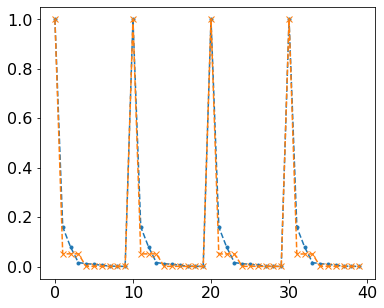

In [8]:
plt.plot(x_data[0],".--")
plt.plot(x_data[-1],"x--")

In [9]:
x_test = x_data.reshape((x_data.shape[0],4,10)).transpose((0,2,1))
x_test.shape

(400, 10, 4)

In [10]:
x_test = x_test[:,1:,:]
x_test.shape

(400, 9, 4)

In [11]:
shape_ = x_test.shape[1:]

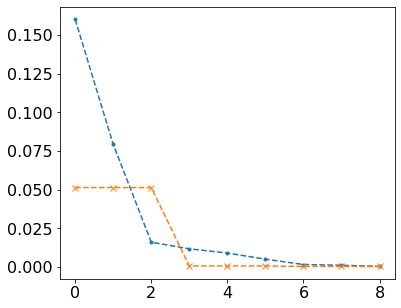

In [12]:
plt.plot(x_test[0,:,0],".--")
plt.plot(x_test[-1,:,0],"x--")

In [13]:
def picker(fillings, fmin, fmax):
    fillings = np.array(fillings)
    pickle = np.where((fillings>= fmin) & (fillings <= fmax))
    return pickle, fillings[pickle]

In [14]:
rate=0.2 # Dropout percentage
bottleneck = 50 # latent space dimension, does not make great differences
fully = True

In [15]:
def cnnx(loss,optimizer,activation0,activation,x_shape,dim1=(16,(3,)),dim2=(16,(3,)), fully=False):
    """ 
    Pretty Standard Convolutional Autoencoder with a fully-connected latent space
    activation0: Activations "inside" the CAE
    activation: Last activation (important depending on the range of the pixel values)
    """
    in_dim = x_shape
    input_img = Input(shape=in_dim)
   
    #x1 = Conv1D(*dim1, activation=activation0, padding='same')(input_img)
    #x2 = MaxPooling1D((2,), padding='same')(x1)
    #x2 = Conv1D(*dim2, activation=activation0, padding='same')(x2)
    #x3 = MaxPooling1D((2,), padding='same')(x2)
    #encoded = Conv1D(*dim2, activation=activation0, padding='same')(x2)
    
    encoded = Flatten()(input_img)
    encoded = Dense(units=100,activation=activation0)(encoded)
    encoded = tf.keras.layers.Dropout(rate)(encoded)
    encoded = Dense(units=25,activation=activation0)(encoded)
    
    y = Dense(units=100,activation=activation0)(encoded)
    y = tf.keras.layers.Dropout(rate)(y)

    #y=UpSampling1D(2)(encoded)
    #y=Conv1D(*dim1, activation=activation0, padding='same')(y)
    #y=UpSampling1D(2)(y)
    decoded = Dense(np.prod(in_dim), activation=activation)(y)
    decoded = tf.keras.layers.Reshape(in_dim)(decoded)
    

    cnn = Model(input_img, decoded)
    cnn.compile(loss=loss,optimizer=optimizer)
    return cnn

In [16]:
# Show Network architecture
cnn = cnnx("mse","adam","linear","relu",x_shape=(10,4))
cnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 4)]           0         
_________________________________________________________________
flatten (Flatten)            (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                2525      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2600      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0     

In [17]:
def create_out(cnn1):
    """
    Creates (dim_freq, dim_phase) matrix of the output loss and the standard deviation
    """
    y_test = cnn1.predict(x_test)
    return 100*eval_loss(x_test,y_test,norm=norm2)/eval_loss(x_test,0*x_test,norm=norm2)

In [18]:
train1s = [(0,0.3),(3.3,np.max(xx)),(1.4,1.8)]

## Training

In [19]:
cnns = [None]*len(train1s)
outs = [None]*len(train1s)

In [20]:
for i in range(len(x_test)):
    x_test[i] = x_test[i]/np.mean(x_test[i])

Epoch 1/100
2/2 [==============================] - 1s 365ms/step - loss: 3.9123 - val_loss: 3.7369
Epoch 2/100
2/2 [==============================] - 0s 29ms/step - loss: 3.6474 - val_loss: 3.5034
Epoch 3/100
2/2 [==============================] - 0s 35ms/step - loss: 3.4604 - val_loss: 3.2953
Epoch 4/100
2/2 [==============================] - 0s 42ms/step - loss: 3.2582 - val_loss: 3.0896
Epoch 5/100
2/2 [==============================] - 0s 37ms/step - loss: 3.0171 - val_loss: 2.8649
Epoch 6/100
2/2 [==============================] - 0s 41ms/step - loss: 2.8127 - val_loss: 2.6030
Epoch 7/100
2/2 [==============================] - 0s 39ms/step - loss: 2.5844 - val_loss: 2.2875
Epoch 8/100
2/2 [==============================] - 0s 36ms/step - loss: 2.2917 - val_loss: 1.9402
Epoch 9/100
2/2 [==============================] - 0s 41ms/step - loss: 1.9720 - val_loss: 1.5577
Epoch 10/100
2/2 [==============================] - 0s 39ms/step - loss: 1.6217 - val_loss: 1.1709
Epoch 11/100
2/2 [

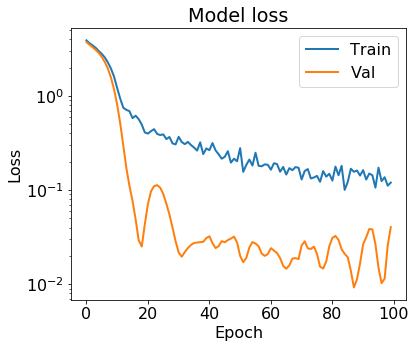

Epoch 1/100
5/5 [==============================] - 0s 33ms/step - loss: 3.0403 - val_loss: 2.6584
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 2.5884 - val_loss: 2.2776
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 2.1830 - val_loss: 1.7454
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 1.6385 - val_loss: 1.0609
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 1.0408 - val_loss: 0.4299
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 0.6451 - val_loss: 0.1421
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 0.5294 - val_loss: 0.0606
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 0.4646 - val_loss: 0.0391
Epoch 9/100
5/5 [==============================] - 0s 10ms/step - loss: 0.3400 - val_loss: 0.0788
Epoch 10/100
5/5 [==============================] - 0s 9ms/step - loss: 0.2896 - val_loss: 0.0852
Epoch 11/100
5/5 [======

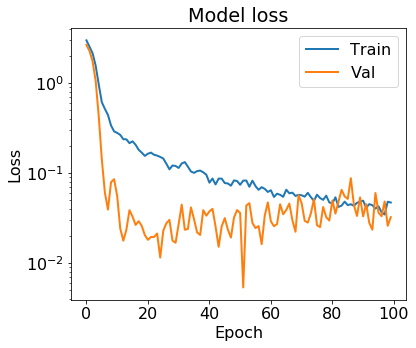

Epoch 1/100
3/3 [==============================] - 0s 67ms/step - loss: 3.1548 - val_loss: 2.8395
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 2.8144 - val_loss: 2.6237
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 2.6275 - val_loss: 2.4855
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 2.4875 - val_loss: 2.3133
Epoch 5/100
3/3 [==============================] - 0s 61ms/step - loss: 2.2716 - val_loss: 2.0890
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 2.0140 - val_loss: 1.8052
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 1.7995 - val_loss: 1.4815
Epoch 8/100
3/3 [==============================] - 0s 18ms/step - loss: 1.5388 - val_loss: 1.1565
Epoch 9/100
3/3 [==============================] - 0s 18ms/step - loss: 1.2690 - val_loss: 0.8645
Epoch 10/100
3/3 [==============================] - 0s 19ms/step - loss: 1.0500 - val_loss: 0.6248
Epoch 11/100
3/3 [=

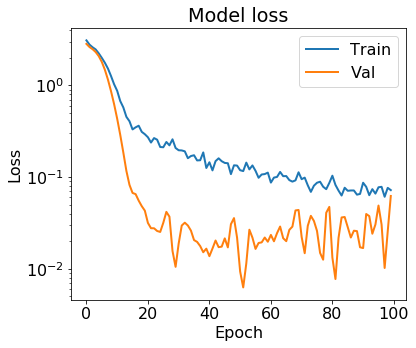

In [21]:
for i,train1 in enumerate(train1s):
    pickle, xx_train = picker(xx,*train1)
    x_train = x_test[pickle]
    cnns[i] = training(x_train = x_train,choose_cnn = cnnx, name = name, provide_cnn = False,
                 load_prev= False, num_epochs = 100,  verbose_val=1, batch_size = 16, shuffle=True, early=False,
                 loss="mse", activation0 = 'relu', activation = 'linear', optimizer = "adam",
                 dim1=(16,(3,)), dim2=(16,(3,)), x_shape = shape_)
    outs[i] = create_out(cnns[i])

2-0


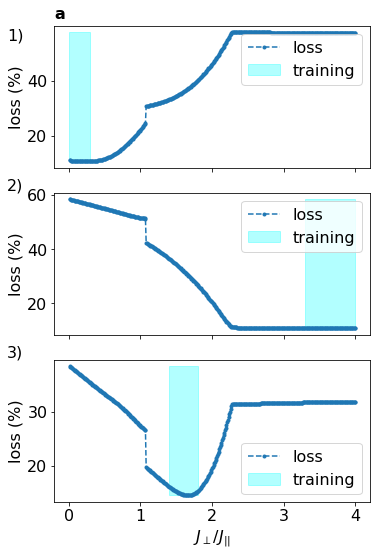

In [22]:
fig, axs = plt.subplots(nrows=3,figsize=(5.5,8),sharex=True)
for i,train1 in enumerate(train1s):
    ax = axs[i]
    out = outs[i]
    ax.plot(xx,out,".--",label="loss")
    ax.set_ylabel("loss (%)")
    ax.fill_between(*[train1],out.min(),out.max(),alpha=0.3,color="cyan", label="training")
    ax.legend()
    #ax.set_ylim(0,1.02*np.max(out))
axs[-1].set_xlabel("$J_\perp/J_{{||}}$")
axs[0].text(0,1.05,'a',weight="bold", transform = axs[0].transAxes)
axs[0].text(-0.15,0.9,"1)", transform = axs[0].transAxes)
plt.tight_layout()
for i in range(1,3):
    axs[i].text(-0.15,1.02,str(i+1) + ")", transform = axs[i].transAxes)

plt.savefig("plots/" + name + "_renormalized.png")
plt.savefig("plots/" + name + "_renormalized.pdf")
print(name)

In [23]:
np.savez("data_results/" + name + "_data", outs = outs, xx = xx, train1s = train1s)